In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [5]:
# Import Data Set

cleaned_df = pd.read_csv('Clean_Telco_Customer_Churn.csv')
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
cleaned_df.shape

(7043, 20)

In [7]:
#Convert all the non-numeric columns to numerical data types

for column in cleaned_df.columns:
   if cleaned_df[column].dtype == np.number:
      continue
   cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

C:\Users\richj\AppData\Local\Temp\ipykernel_13436\2870899400.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:


In [8]:
cleaned_df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [9]:
#Check to see that all data types are numeric

cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [10]:
#Scale the cleaned data

X = cleaned_df.drop('Churn', axis = 1) 
y = cleaned_df['Churn']

#Standardizing/scaling the features

X = StandardScaler().fit_transform(X)

In [11]:
#Split the data into 80% training and 20% testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Create the model
model = LogisticRegression()

#Train the model
model.fit(x_train, y_train)

LogisticRegression()

In [13]:
predictions = model.predict(x_test)

#printing the predictions
print(predictions)

[1 0 0 ... 0 0 1]


In [14]:
#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



## Logistic Regression Model

### The recall of this model is approx 90% which means it correctly identified 90% of the customers which were retained. The precision was approx 86% and the f1 score was 88%. The accuracy of this model is about 82%.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import itertools
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import seaborn as sns


In [21]:
### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {accuracy_score(y_test, y_hat_test)}')
    print(f'train accuracy: {accuracy_score(y_train, y_hat_train)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

Model: RandomForestClassifier(n_estimators=10)
------------------------------------------------------------


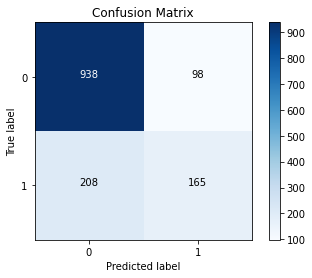

test accuracy: 0.7828246983676366
train accuracy: 0.981008164714235
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0           938   98  1036
1           208  165   373
All        1146  263  1409

test report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.63      0.44      0.52       373

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4138
           1       0.99      0.94      0.96      1496

    accuracy                           0.98      5634
   macro avg       0.

In [22]:
# Instantiate and fit a RandomForestClassifier with n_estimators=100
forest_1 = RandomForestClassifier(n_estimators=10)

forest_1.fit(x_train, y_train)

#predictions
y_hat_train=forest_1.predict(x_train)
y_hat_test = forest_1.predict(x_test)

# model results

metrics(forest_1, y_train, y_test, y_hat_train, y_hat_test)

Train AUC: 0.9672254738267733
Test AUC: 0.6738823273675821


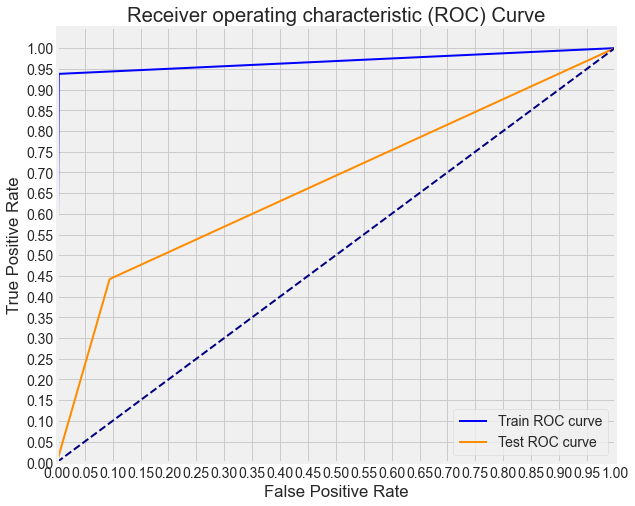

In [26]:
#ROC Curve
from sklearn.metrics import roc_curve, auc

y_score_test = forest_1.predict(x_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_score_test)

y_score_train = forest_1.predict(x_train)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_score_train)

# Train AUC
print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10,8))
lw = 2
plt.style.use('fivethirtyeight')

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Model

### had slightly better recall than Logistic regression at 91%, but had less precision and less accuracy than Logistic regression model.

In [29]:
#HyperTune

rf_param = RandomForestClassifier()
param_grid = {
     'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,20],
    'min_samples_split':[5,20,50],
    'min_samples_leaf':[15,20,30],
    'n_estimators': [1,5,10]
}
gs = GridSearchCV(forest_1, param_grid, cv=3, n_jobs=-1)
gs.fit(x_train, y_train)
gs.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 30,
 'min_samples_split': 20,
 'n_estimators': 10}

Model: RandomForestClassifier(max_depth=20, min_samples_leaf=15, min_samples_split=50,
                       n_estimators=10)
------------------------------------------------------------


C:\Users\richj\AppData\Local\Temp\ipykernel_13436\3634145277.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


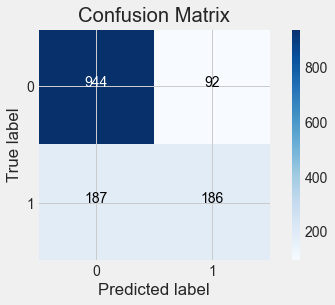

test accuracy: 0.8019872249822569
train accuracy: 0.8168264110756124
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted     0    1   All
Actual                    
0           944   92  1036
1           187  186   373
All        1131  278  1409

test report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4138
           1       0.71      0.52      0.60      1496

    accuracy                           0.82      5634
   macro avg       0

In [32]:
# Instantiate and fit a RandomForestClassifier with n_estimators=100
forest_2 = RandomForestClassifier(n_estimators=10,
                                criterion= 'gini',
                                max_depth= 20,
                                min_samples_leaf= 15,
                                min_samples_split= 50)

forest_2.fit(x_train, y_train)

#predictions
y_hat_train=forest_2.predict(x_train)
y_hat_test = forest_2.predict(x_test)

# model results

metrics(forest_2, y_train, y_test, y_hat_train, y_hat_test)
# To get the feature importance


## Results

### Even though hypertuning increased the Random Forest Model slighlty, the logistic regression model still perfomed better and is the model that I would use